>  # **Movie Genre Classification**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('ftp://ftp.fu-berlin.de/pub/misc/movies/database/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# DATA IMPORT AND INITIAL EXPLORATION

In [2]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np

In [3]:
# DEFINE COLUMN NAMES FOR THE DATASETS
columns = [ 'Movie Name' , 'Genre' , 'Description']
column = ['Movie Name' , 'Description']

In [4]:
# READ THE TRAINING DATA FROM 'train_data.txt' WITH A CUSTOM DELIMITER ':::'
df_train = pd.read_csv('./train_data.txt' , delimiter=':::' , engine='python' , names=columns , index_col=0 )

# DISPLAY THE FIRST FEW ROWS OF THE TRAINING DATASET
df_train.head()

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
# READ THE TEST DATA FROM 'test_data_solution.txt' WITH A CUSTOM DELIMITER ':::'
df_test = pd.read_csv('./test_data_solution.txt', delimiter=':::' , engine='python' , names=columns , index_col=0 )

# DISPLAY THE FIRST FEW ROWS OF THE TEST DATASET
df_test.head()

,Movie Name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


# DATA PREPROCESSING

In [6]:
# CONVERT THE 'DESCRIPTION' COLUMN TO LOWERCASE IN BOTH TRAINING AND TEST DATASETS
df_train.loc[:,'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:,'Description'] = df_test['Description'].astype(str).str.lower()

In [7]:
# DROP THE 'MOVIE NAME' COLUMN FROM BOTH TRAINING AND TEST DATASETS
df_train.drop(columns=['Movie Name'], inplace = True)
df_test.drop(columns=['Movie Name'], inplace = True)

In [8]:
# DISPLAY THE FIRST FEW ROWS OF THE MODIFIED TRAINING DATASET
df_train.head()

,Genre,Description
1,drama,listening in to a conversation between his do...
2,thriller,a brother and sister with a past incestuous r...
3,adult,as the bus empties the students for their fie...
4,drama,to help their unemployed father make ends mee...
5,drama,the film's title refers not only to the un-re...


In [9]:
# DISPLAY THE FIRST FEW ROWS OF THE MODIFIED TEST DATASET
df_test.head()

,Genre,Description
1,thriller,"l.r. brane loves his life - his car, his apar..."
2,comedy,"spain, march 1964: quico is a very naughty ch..."
3,documentary,one year in the life of albin and his family ...
4,drama,"his father has died, he hasn't spoken with hi..."
5,drama,before he was known internationally as a mart...


In [10]:
# DISPLAY INFORMATION ABOUT THE TRAINING DATASET
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        54214 non-null  object
 1   Description  54214 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [11]:
# DISPLAY INFORMATION ABOUT THE TEST DATASET
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [12]:
# DISPLAY THE SHAPE (NUMBER OF ROWS AND COLUMNS) OF THE TRAINING DATASET
print(df_train.shape)

(54214, 2)


In [13]:
# DISPLAY THE SHAPE (NUMBER OF ROWS AND COLUMNS) OF THE TEST DATASET
print(df_test.shape)

(54200, 2)


# DATA CLEANING

In [14]:
# CHECK FOR DUPLICATE ROWS IN THE TRAINING DATASET
print("TRAINING DUPLICATES:", df_train.duplicated().sum())

TRAINING DUPLICATES: 110


In [15]:
# CHECK FOR DUPLICATE ROWS IN THE TEST DATASET
print("TEST DUPLICATES:", df_test.duplicated().sum())

TEST DUPLICATES: 114


In [16]:
# DROP DUPLICATE ROWS FROM THE TRAINING DATASET
df_train = df_train.drop_duplicates(keep ='first')

# DROP DUPLICATE ROWS FROM THE TEST DATASET
df_test = df_test.drop_duplicates(keep = 'first')

In [17]:
# VERIFY NO DUPLICATES REMAIN IN THE TRAINING DATASET
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())

# VERIFY NO DUPLICATES REMAIN IN THE TEST DATASET
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [18]:
# VERIFY NO DUPLICATES REMAIN IN THE TRAINING DATASET
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())

# VERIFY NO DUPLICATES REMAIN IN THE TEST DATASET
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [19]:
# DISPLAY THE SHAPE OF THE TRAINING DATASET AFTER REMOVING DUPLICATES
print(df_train.shape)

# DISPLAY THE SHAPE OF THE TEST DATASET AFTER REMOVING DUPLICATES
print(df_test.shape)

(54104, 2)
(54086, 2)


In [20]:
print(df_train.columns)
print(df_test.columns)

Index(['Genre', 'Description'], dtype='object')
Index(['Genre', 'Description'], dtype='object')


In [21]:
# SEPARATE FEATURES AND LABELS FOR TRAINING AND TEST DATASETS
x_train_full = df_train['Description']
y_train_full = df_train['Genre']

x_test = df_test['Description']
y_test = df_test['Genre']

In [22]:
# DISPLAY THE SHAPES OF THE FEATURE AND LABEL ARRAYS FOR THE TRAINING DATASET
print(x_train_full.shape)
print(y_train_full.shape)

(54104,)
(54104,)


In [23]:
# DISPLAY THE SHAPES OF THE FEATURE AND LABEL ARRAYS FOR THE TEST DATASET
print(x_test.shape)
print(y_test.shape)

(54086,)
(54086,)


# DATA VISUALIZATION

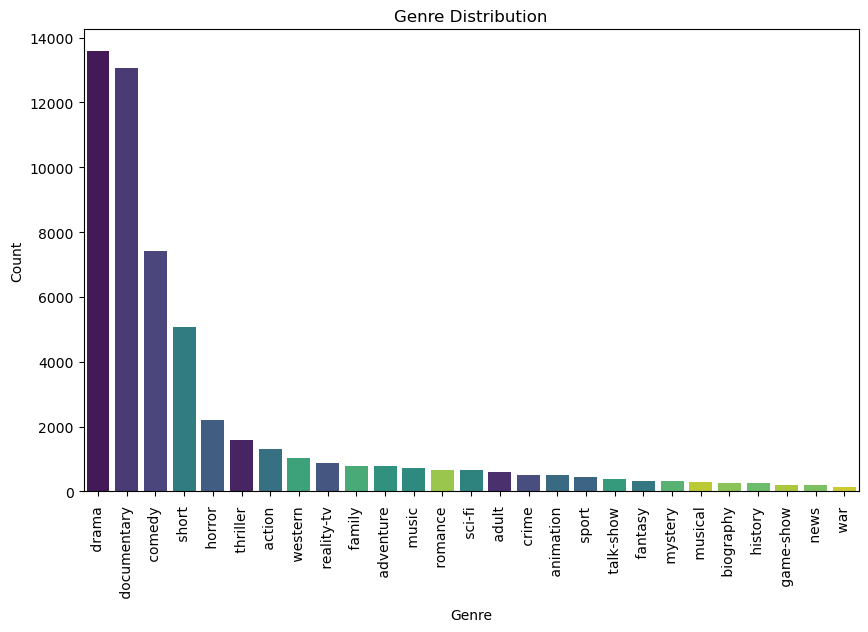

In [24]:
# IMPORTING VISUALIZATION LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

# PLOT THE DISTRIBUTION OF GENRES IN THE TRAINING DATASET
plt.figure(figsize=(10,6))
sns.countplot(x='Genre', hue='Genre', data=df_train, order=df_train['Genre'].value_counts().index, palette='viridis', legend=False)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# DATA SPLITTING

In [25]:
# IMPORTING train_test_split FROM sklearn TO SPLIT THE DATA
from sklearn.model_selection import train_test_split

# SPLIT THE TRAINING DATA INTO TRAINING AND VALIDATION SETS
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

In [26]:
# DISPLAY THE SHAPES OF THE TRAINING , VALIDATION AND TEST FEATURE SETS
print(X_train.shape)
print(X_val.shape)
print(x_test.shape)

print('\n')

# DISPLAY THE SHAPES OF THE TRAINING , VALIDATION AND TEST LABEL SETS
print(Y_train.shape)
print(Y_val.shape)
print(y_test.shape)

(43283,)
(10821,)
(54086,)


(43283,)
(10821,)
(54086,)


# FEATURE EXTRACTION

In [27]:
# IMPORT TfidfVectorizer FROM sklearn FOR FEATURE EXTRACTION
from sklearn.feature_extraction.text import TfidfVectorizer

# INITIALIZE TF-IDF VECTORIZER
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

# FIT AND TRANSFORM THE TRAINING FEATURES, AND TRANSFORM THE VALIDATION AND TEST FEATURES
X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)

# MODEL TRAINING (NAIVE BAYES)

In [28]:
# IMPORT MULTINOMIAL NAIVE BAYES CLASSIFIER FROM sklearn
from sklearn.naive_bayes import MultinomialNB

# TRAIN THE MULTINOMIAL NAIVE BAYES CLASSIFIER
nb = MultinomialNB()
nb.fit(X_train_vec, Y_train)

MultinomialNB()

# MODEL PREDICTIONS

In [29]:
# MAKE PREDICTIONS ON THE VALIDATION SET
y_pred_val = nb.predict(X_val_vec)

# MODEL EVALUATION

In [30]:
# IMPORT EVALUATION METRICS FROM sklearn
from sklearn.metrics import accuracy_score, classification_report

# EVALUATE THE MODEL ON THE VALIDATION SET
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5261990573884114
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.52      0.06      0.11       271
       adult        0.50      0.03      0.06       118
   adventure        0.64      0.06      0.12       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.51      0.44      0.47      1445
       crime        0.00      0.00      0.00        88
 documentary        0.59      0.89      0.71      2685
       drama        0.46      0.83      0.59      2720
      family        0.00      0.00      0.00       145
     fantasy        0.00      0.00      0.00        57
   game-show        1.00      0.20      0.33        40
     history        0.00      0.00      0.00        52
      horror        0.71      0.34      0.46       429
       music        0.93      0.09      0.17       148
     musical        0.00      0.00      0.00 

In [31]:
# MAKE PREDICTIONS ON THE TEST SET
y_pred_test = nb.predict(X_test_vec)

# EVALUATE THE MODEL ON THE TEST SET
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Test Accuracy: 0.5188773434899974
Test Classification Report:
               precision    recall  f1-score   support

      action        0.59      0.09      0.15      1314
       adult        0.54      0.06      0.10       590
   adventure        0.81      0.05      0.10       773
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.42      0.46      7437
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.87      0.69     13085
       drama        0.45      0.83      0.59     13565
      family        0.00      0.00      0.00       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.27      0.43       193
     history        0.00      0.00      0.00       243
      horror        0.70      0.33      0.45      2204
       music        0.79      0.09      0.16       720
     musical        0.00      0.00      0.00       273
 